In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier





In [8]:
df= pd.read_csv("C:/Users/stefa/Documents/MASTER/tareas/sample_mmp.csv")

C:\Users\stefa\AppData\Local\Temp\ipykernel_21668\4242051981.py:1: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("C:/Users/stefa/Documents/MASTER/tareas/sample_mmp.csv")


In [9]:
df.head(5)

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0,0,NaN,...,19951.0,0,NaN,0.0,0,0,0.0,0.0,11.0,1
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0,0,NaN,...,48753.0,0,0.0,0.0,0,0,0.0,1.0,3.0,0
2,2731904,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.0,0,NaN,...,33111.0,1,0.0,0.0,1,1,0.0,0.0,15.0,0
3,1359513,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.0,0,NaN,...,48473.0,1,NaN,0.0,0,0,0.0,0.0,15.0,1
4,236059,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.0,0,NaN,...,4343.0,1,NaN,0.0,1,0,0.0,1.0,13.0,1


In [10]:
df.shape

(500000, 84)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,500000.0,4.458888e+06,2.575619e+06,2.0,2227692.50,4461367.5,6.690936e+06,8.921471e+06
IsBeta,500000.0,2.000000e-06,1.414214e-03,0.0,0.00,0.0,0.000000e+00,1.000000e+00
RtpStateBitfield,498168.0,6.846207e+00,1.023049e+00,0.0,7.00,7.0,7.000000e+00,3.500000e+01
IsSxsPassiveMode,500000.0,1.724200e-02,1.301720e-01,0.0,0.00,0.0,0.000000e+00,1.000000e+00
DefaultBrowsersIdentifier,24061.0,1.652825e+03,1.004754e+03,1.0,788.00,1632.0,2.381000e+03,3.209000e+03
AVProductStatesIdentifier,498062.0,4.785091e+04,1.402309e+04,3.0,49480.00,53447.0,5.344700e+04,7.049200e+04
AVProductsInstalled,498062.0,1.326763e+00,5.229999e-01,1.0,1.00,1.0,2.000000e+00,5.000000e+00
AVProductsEnabled,498062.0,1.020714e+00,1.666080e-01,0.0,1.00,1.0,1.000000e+00,4.000000e+00
HasTpm,500000.0,9.878160e-01,1.097068e-01,0.0,1.00,1.0,1.000000e+00,1.000000e+00
CountryIdentifier,500000.0,1.080375e+02,6.306854e+01,1.0,51.00,97.0,1.620000e+02,2.220000e+02


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

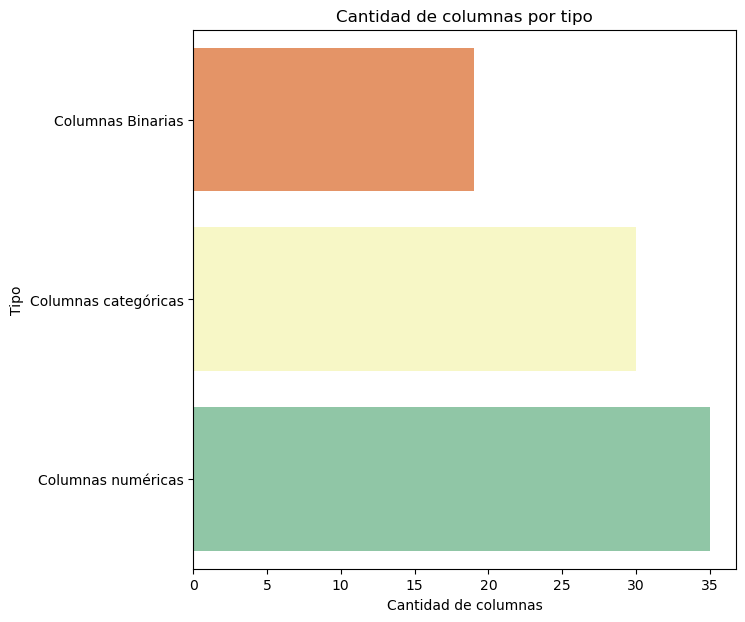

In [13]:
# Obtener información sobre registros no nulos
missing_df = pd.DataFrame({'Columna': df.columns, 'Número de registros': df.count(), 'Total': len(df)}).sort_values("Número de registros", ascending=False)

# Obtener información sobre la cardinalidad
cardinality_df = pd.DataFrame({'Columna': df.columns, 'Cardinality': df.nunique()}).sort_values("Cardinality", ascending=False)
cardinality_df = cardinality_df[cardinality_df['Cardinality'] > 2]  # Filtrar columnas con más de 2 valores únicos

# Obtener información sobre el tipo de columnas
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
true_numerical_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col not in binary_columns]
categorical_columns = [col for col in df.columns if col not in true_numerical_columns and col not in binary_columns]

type_df = pd.DataFrame({'Type': ['Columnas Binarias', 'Columnas numéricas', 'Columnas categóricas'],
                        'Conteo de Columnas': [len(binary_columns), len(true_numerical_columns), len(categorical_columns)]}).sort_values('Conteo de Columnas', ascending=True)


f, ax = plt.subplots(figsize=(7, 7))


sns.barplot(x="Conteo de Columnas", y="Type", data=type_df, palette='Spectral', hue = 'Type', legend=False)

plt.title('Cantidad de columnas por tipo')
plt.xlabel('Cantidad de columnas')
plt.ylabel('Tipo')

plt.show()



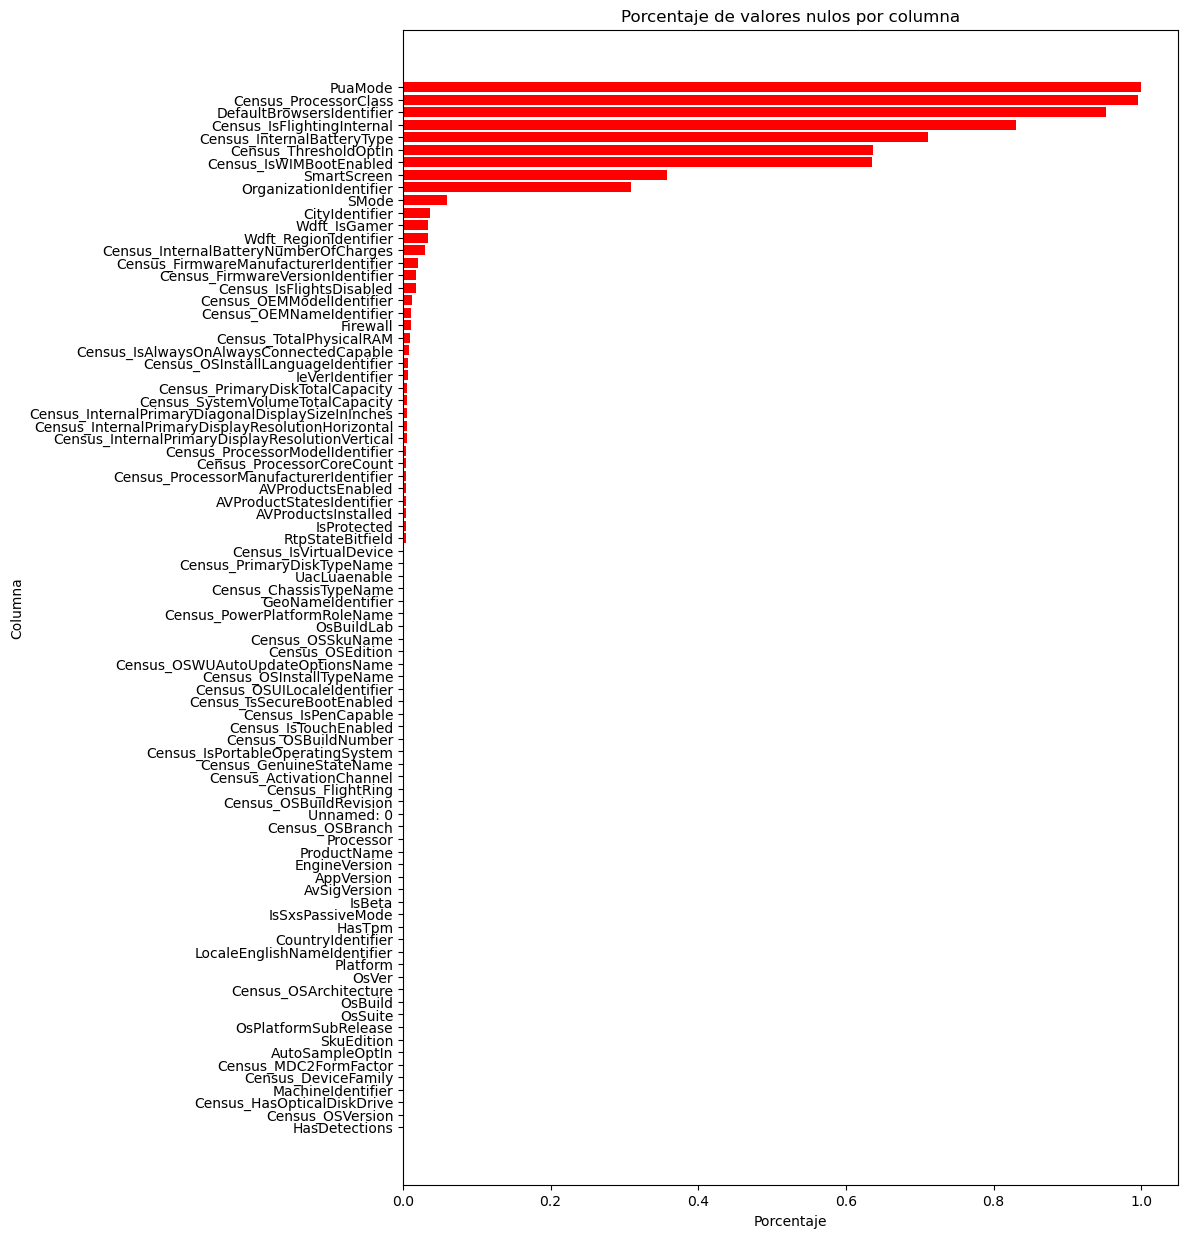

In [14]:
# Obtener el porcentaje de valores nulos por columna
df_null_values = df.isnull().mean().sort_values(ascending=False)


fig, ax = plt.subplots(figsize=(10,15))

# Crear el gráfico de barras horizontal
ax.barh(y=df_null_values.index,  # Posicionar las barras según los índices
        width=df_null_values,  
        color='red')  

# Invertir el eje Y para que las columnas aparezcan en orden correcto
ax.invert_yaxis()

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje')
plt.ylabel('Columna')


plt.show()


C:\Users\stefa\AppData\Local\Temp\ipykernel_21668\1086767184.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cardinalidad', y='column', data=df_cardinalidad,palette="coolwarm")


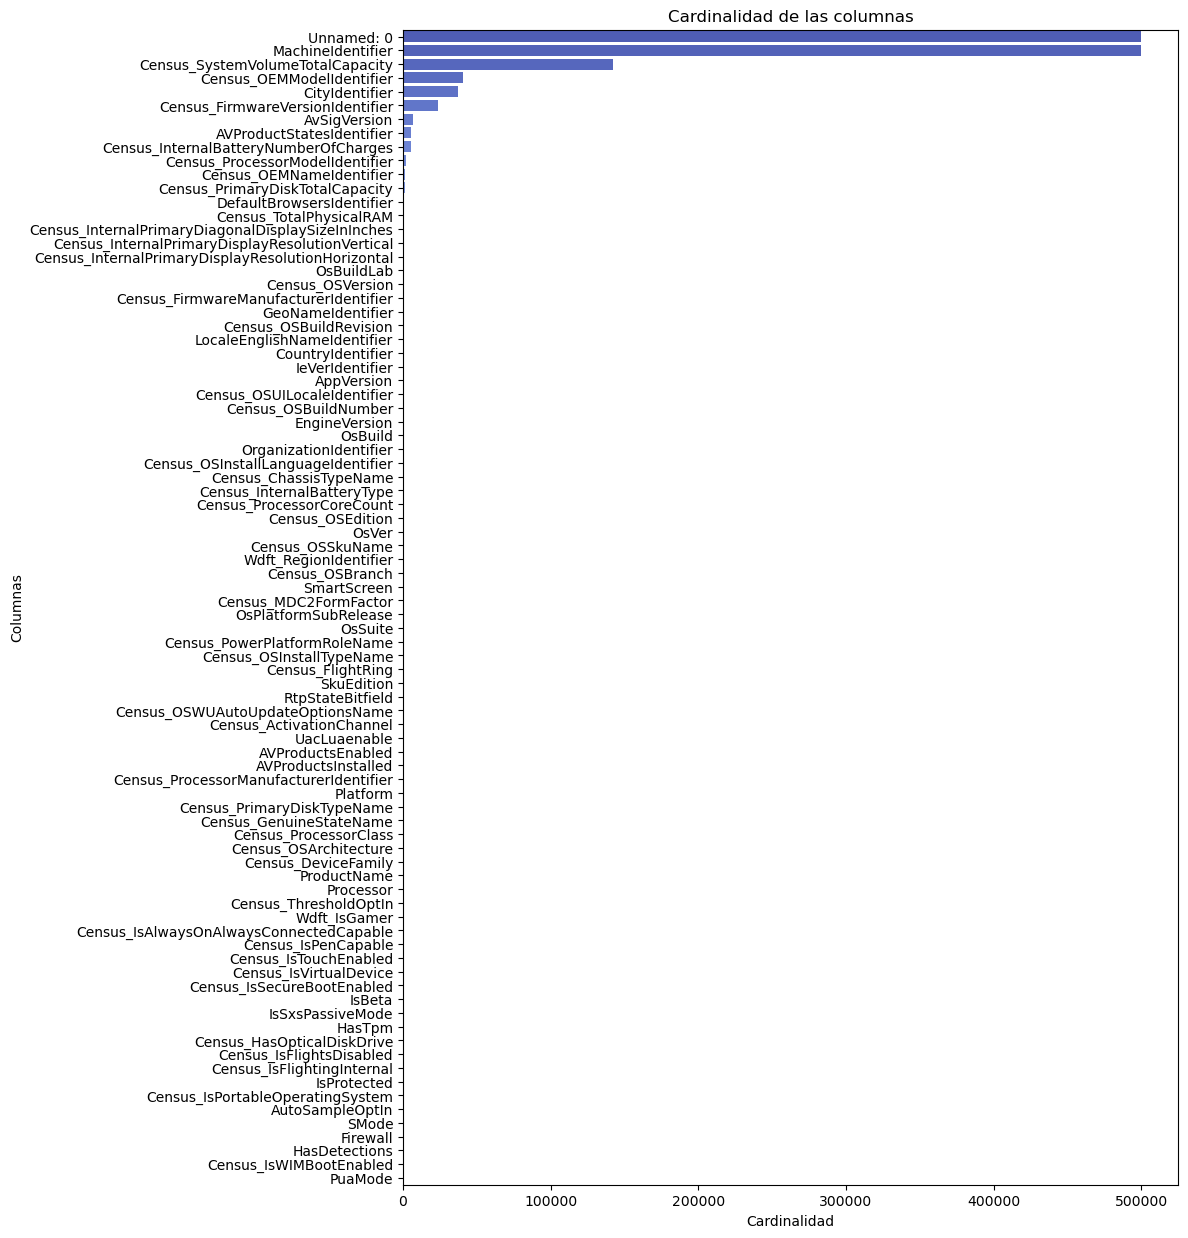

In [15]:
# Calcular la cardinalidad de cada columna
cardinalidad = df.nunique()
df_cardinalidad = pd.DataFrame({'column': cardinalidad.index, 'cardinalidad': cardinalidad.values})
df_cardinalidad = df_cardinalidad.sort_values(by='cardinalidad', ascending=False)

fig, ax = plt.subplots(figsize=(10,15))
sns.barplot(x='cardinalidad', y='column', data=df_cardinalidad,palette="coolwarm")

plt.title('Cardinalidad de las columnas')
plt.xlabel('Cardinalidad')
plt.ylabel('Columnas')

plt.show()

In [16]:
df2 = df.copy()

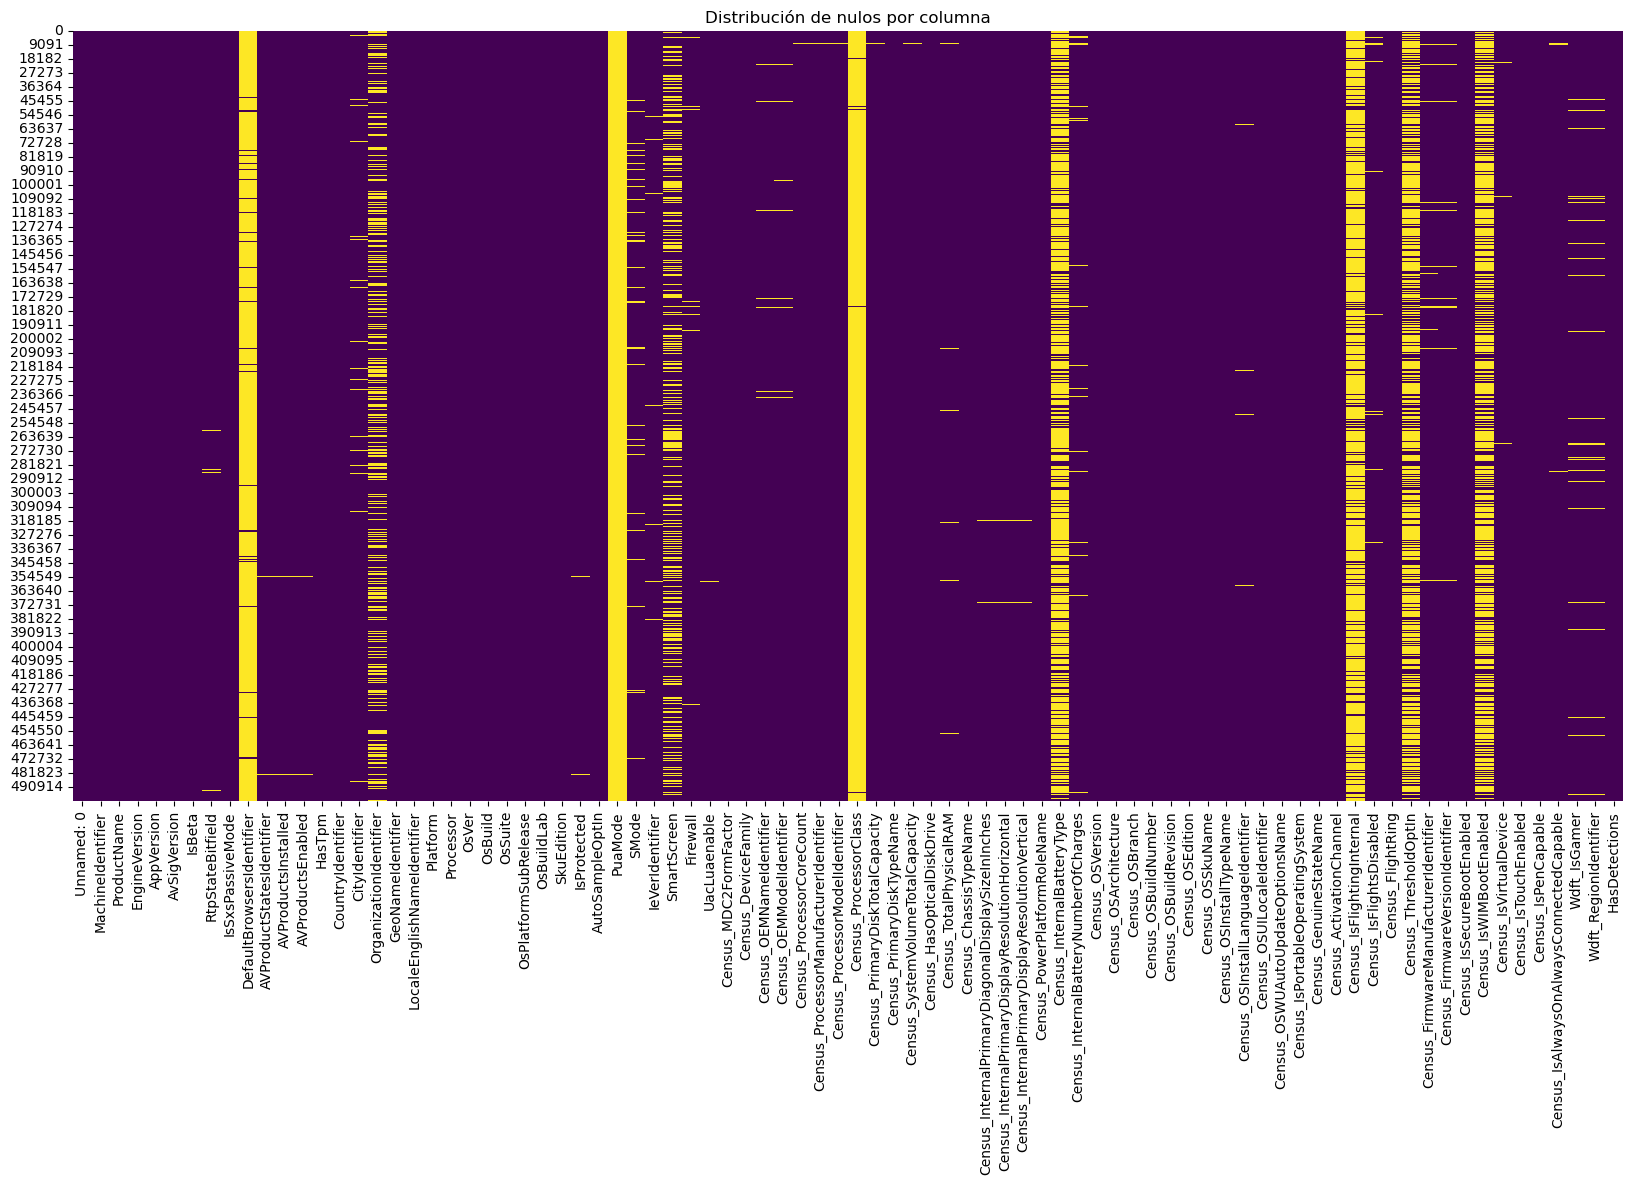

In [17]:
# Distribución de nulos 
plt.figure(figsize=(20, 10))
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')
plt.title('Distribución de nulos por columna')
plt.show()

In [18]:
#Memoria RAM por procesador
df2['RAM_x_procesador'] = df2['Census_TotalPhysicalRAM']/ df2['Census_ProcessorCoreCount']
df2['RAM_x_procesador'] = df2['RAM_x_procesador'].fillna(-1)

In [19]:
# Capacidad total del disco primario
df2['capacidad_total_disco_primario'] = df2['Census_PrimaryDiskTotalCapacity']

# Capacidad de la unidad C:
df2['unidad_c_capacidad'] = df2['Census_SystemVolumeTotalCapacity']

# Proporción de uso de la unidad C:
df2['proporcion_uso_unidad_c'] = df2['unidad_c_capacidad'] / df2['capacidad_total_disco_primario']

#relleno a -1 los nulos
df2['proporcion_uso_unidad_c'].fillna(-1, inplace=True)

In [20]:
# Capacidad total del disco primario en bytes
df2['capacidad_total_disco_primario'] = df2['Census_PrimaryDiskTotalCapacity']

# Capacidad de la unidad C: en bytes
df2['capacidad_unidad_c'] = df2['Census_SystemVolumeTotalCapacity']

# Espacio no utilizado en el disco primario en bytes
df2['espacio_no_utilizado_disco_primario'] = df2['capacidad_total_disco_primario'] - df2['capacidad_unidad_c']


In [21]:
df2.head(5)

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,RAM_x_procesador,capacidad_total_disco_primario,unidad_c_capacidad,proporcion_uso_unidad_c,capacidad_unidad_c,espacio_no_utilizado_disco_primario
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0,0,NaN,...,0.0,0.0,11.0,1,2048.0,953869.0,952838.0,0.998919,952838.0,1031.0
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0,0,NaN,...,0.0,1.0,3.0,0,2048.0,476940.0,457600.0,0.959450,457600.0,19340.0
2,2731904,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.0,0,NaN,...,0.0,0.0,15.0,0,2048.0,244198.0,221251.0,0.906031,221251.0,22947.0
3,1359513,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.0,0,NaN,...,0.0,0.0,15.0,1,1024.0,228936.0,228321.0,0.997314,228321.0,615.0
4,236059,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.0,0,NaN,...,0.0,1.0,13.0,1,1024.0,476940.0,464374.0,0.973653,464374.0,12566.0


In [22]:
# Obtiene las columnas con más del 90% de valores nulos
columnas_con_nulos = np.where(np.mean(df2.isnull(), axis=0) > 0.9)[0]

# Si no hay columnas con más del 90% de valores nulos
if not columnas_con_nulos.size:
    print('No hay columnas con más del 90% de valores nulos')
else:
    print('Las siguientes columnas tienen más del 90% de valores nulos:')
    print(*df2.columns[columnas_con_nulos], sep='\n')


Las siguientes columnas tienen más del 90% de valores nulos:
DefaultBrowsersIdentifier
PuaMode
Census_ProcessorClass


In [23]:
# Código de imputación de valores nulos
numeric_features = df2.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df2.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

numeric_imputer = SimpleImputer(strategy='median')
df2[numeric_features] = numeric_imputer.fit_transform(df2[numeric_features])

categorical_imputer = SimpleImputer(strategy='most_frequent')
df2[categorical_features] = categorical_imputer.fit_transform(df2[categorical_features])


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 90 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  float64
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  float64
 7   RtpStateBitfield                                   500000 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  float6

In [25]:
df2 = df2.drop(["Unnamed: 0"], axis = 1)
#elimino Unnamed: 0

In [26]:
df2.set_index("MachineIdentifier", inplace = True)
#defino "MachineIdentifier" como index

In [27]:
df2.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 88 entries, ProductName to espacio_no_utilizado_disco_primario
dtypes: float64(59), object(29)
memory usage: 339.5+ MB


In [28]:
TARGET = 'HasDetections'
df2[TARGET].mean()

0.499906

In [29]:
df2[TARGET].value_counts(normalize= True)*100

0.0    50.0094
1.0    49.9906
Name: HasDetections, dtype: float64

In [30]:

tipos = df2.dtypes
#  diccionario para contar las columnas por tipo
columnas_por_tipo = {}
for col, tipo in tipos.items():
    if tipo not in columnas_por_tipo:
        columnas_por_tipo[tipo] = 0
    columnas_por_tipo[tipo] += 1


for tipo, num_columnas in columnas_por_tipo.items():
    print(f"{tipo}: {num_columnas}")


object: 29
float64: 59


In [31]:
lista_eliminar = ["AutoSampleOptIn", "OsBuildLab", "CityIdentifier","GeoNameIdentifier" ,"Census_InternalBatteryNumberOfCharges", "IsBeta", "Census_InternalPrimaryDisplayResolutionHorizontal", "Census_InternalPrimaryDisplayResolutionVertical","UacLuaenable", "Census_InternalPrimaryDiagonalDisplaySizeInInches" ,'Census_IsWIMBootEnabled','PuaMode']
#columnas a eliminar por no aportar información relevante al DF o que ya la tengo en otras columnas o que tiene un porcentaje de nulos muy alto

In [32]:
df3 = df2.drop(lista_eliminar, axis = 1)

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 76 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   ProductName                              500000 non-null  object 
 1   EngineVersion                            500000 non-null  object 
 2   AppVersion                               500000 non-null  object 
 3   AvSigVersion                             500000 non-null  object 
 4   RtpStateBitfield                         500000 non-null  float64
 5   IsSxsPassiveMode                         500000 non-null  float64
 6   DefaultBrowsersIdentifier                500000 non-null  float64
 7   AVProductStatesIdentifier                500000 non-null  float64
 8   AVProductsInstalled                      500000 non-null  float64
 9   AVProductsEnabled                        500000 non

In [34]:
def imprimir_correlaciones(df, umbral=0.789):
    # Calcular la matriz de correlación
    matriz_correlacion = df.corr()

    # Obtener las columnas con correlación superior al umbral
    columnas_correlacionadas = []
    for i in range(len(matriz_correlacion.columns)):
        for j in range(i):
            if abs(matriz_correlacion.iloc[i, j]) > umbral:
                col1 = matriz_correlacion.columns[i]
                col2 = matriz_correlacion.columns[j]
                correlacion = matriz_correlacion.iloc[i, j] * 100  # Multiplicar por 100 para obtener el porcentaje
                columnas_correlacionadas.append((col1, col2, correlacion))

    # Imprimir las columnas con correlación superior al umbral
    for col1, col2, correlacion in columnas_correlacionadas:
        print(f"{col1} y {col2} tienen una correlación del {correlacion:.2f}%")

# Llamar a la función con tu DataFrame
imprimir_correlaciones(df3, umbral=0.789)


C:\Users\stefa\AppData\Local\Temp\ipykernel_21668\456360275.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


IsSxsPassiveMode y RtpStateBitfield tienen una correlación del -88.54%
Census_ProcessorModelIdentifier y Census_ProcessorManufacturerIdentifier tienen una correlación del 79.91%
Census_OSBuildNumber y OsBuild tienen una correlación del 93.77%
Census_OSUILocaleIdentifier y Census_OSInstallLanguageIdentifier tienen una correlación del 98.38%
capacidad_total_disco_primario y Census_PrimaryDiskTotalCapacity tienen una correlación del 100.00%
unidad_c_capacidad y Census_SystemVolumeTotalCapacity tienen una correlación del 100.00%
capacidad_unidad_c y Census_SystemVolumeTotalCapacity tienen una correlación del 100.00%
capacidad_unidad_c y unidad_c_capacidad tienen una correlación del 100.00%


In [35]:
# Detectar filas duplicadas
duplicados = df3.duplicated()

# Mostrar el número total de filas duplicadas
total_filas_duplicadas = duplicados.sum()
print(f"Total de filas duplicadas: {total_filas_duplicadas}")


Total de filas duplicadas: 55


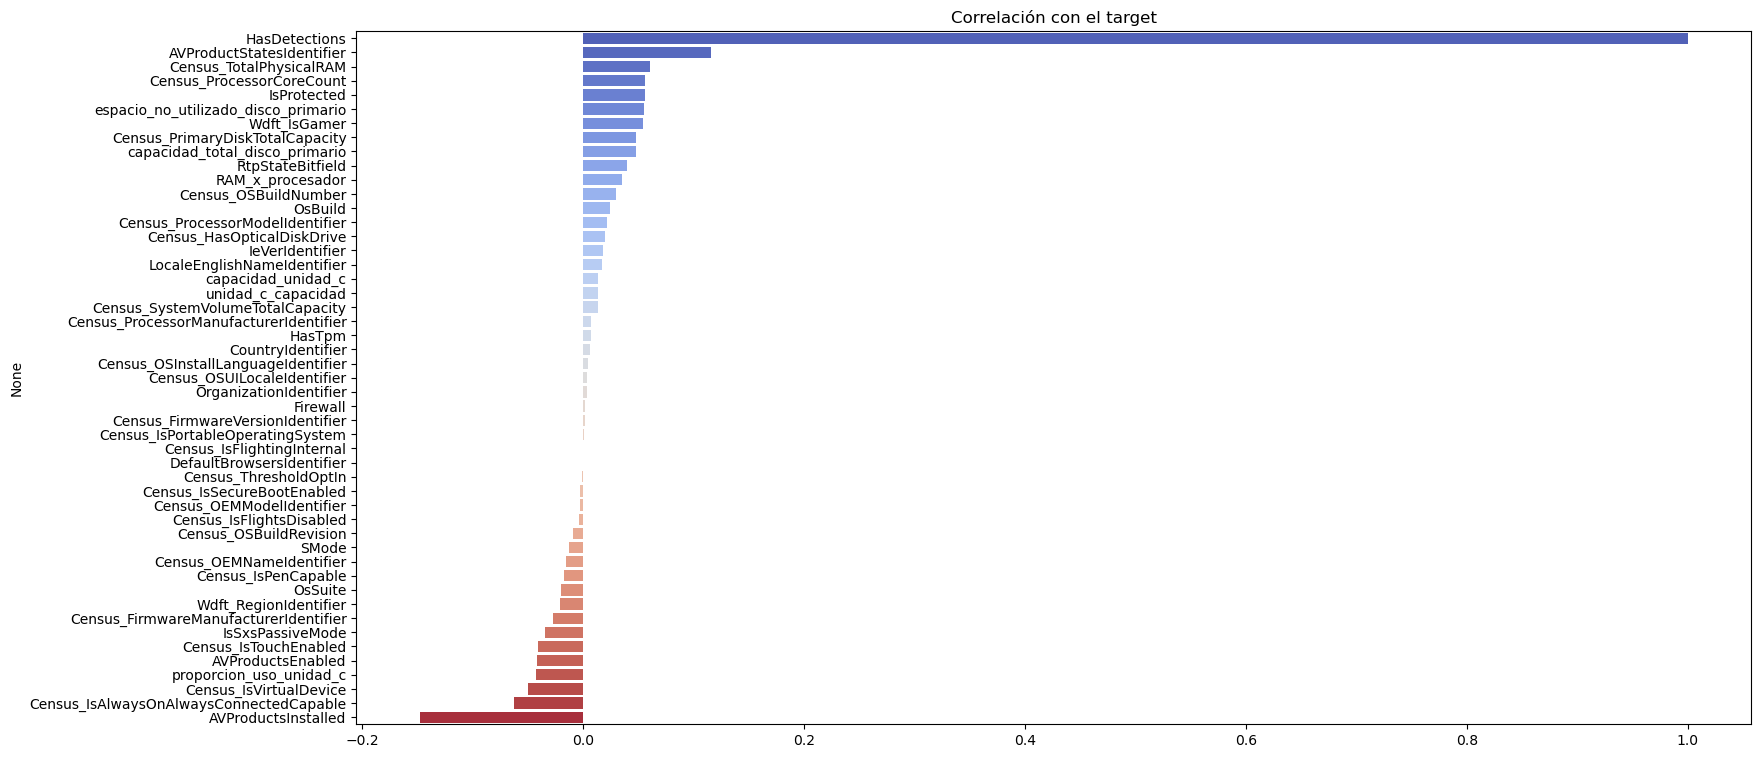

In [36]:
# Calcular la matriz de correlación con respecto a la variable objetivo
correlacion_numericas = df3.select_dtypes(include=['number']).corr()['HasDetections'].sort_values(ascending=False)

# Crear un gráfico de barras para visualizar la correlación
plt.figure(figsize=(18, 9))
sns.barplot(x=correlacion_numericas.values, y=correlacion_numericas.index, hue=correlacion_numericas.index, palette='coolwarm', legend=False)

plt.title('Correlación con el target')

plt.show()


In [37]:
def get_var_list(df):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in df:
        if    (df[i].dtype.kind=="f" or df[i].dtype.kind=="i") and len(df[i].unique())!= 2  and i not in TARGET:
              lista_numericas.append(i)
        elif  (df[i].dtype.kind=="f" or df[i].dtype.kind=="i")  and len(df[i].unique())== 2  and i not in TARGET:
              lista_boolean.append(i)
        elif  (df[i].dtype.kind=="O")  and i not in TARGET:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [38]:
lista_numericas, lista_boolean, lista_categoricas= get_var_list(df3)


In [39]:
lista_boolean

['IsSxsPassiveMode',
 'HasTpm',
 'IsProtected',
 'SMode',
 'Firewall',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled',
 'Census_ThresholdOptIn',
 'Census_IsSecureBootEnabled',
 'Census_IsVirtualDevice',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer']

In [40]:
lista_categoricas

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [41]:
lista_numericas

['RtpStateBitfield',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'OrganizationIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IeVerIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Wdft_RegionIdentifier',
 'RAM_x_procesador',
 'capacidad_total_disco_primario',
 'unidad_c_capacidad',
 'proporcion_uso_unidad_c',
 'capacidad_unidad_c',
 'espacio_no_utilizado_disco_primario']

In [42]:
def setOthers(dataframe, column, num_values):
    top_categories = dataframe[column].value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append('Otros')
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories_list)
    return dataframe[column].fillna('Otros')

In [43]:
df3['Census_PrimaryDiskTypeName'].nunique()

4

In [44]:
df3['Census_PrimaryDiskTypeName'].value_counts(dropna = False)

HDD            326138
SSD            138155
UNKNOWN         20083
Unspecified     15624
Name: Census_PrimaryDiskTypeName, dtype: int64

In [45]:
df3['Census_PrimaryDiskTypeName'] = setOthers(df3, 'Census_PrimaryDiskTypeName', 2)

In [46]:
df3["Census_PrimaryDiskTypeName"].describe()
#convertirlo a -1

count     500000
unique         3
top          HDD
freq      326138
Name: Census_PrimaryDiskTypeName, dtype: object

In [47]:
df3['Census_PrimaryDiskTypeName'].value_counts(dropna = False)

HDD      326138
SSD      138155
Otros     35707
Name: Census_PrimaryDiskTypeName, dtype: int64

In [48]:
df3['Census_ChassisTypeName'].value_counts(dropna = False)

Notebook               294269
Desktop                104979
Laptop                  38261
Portable                20181
AllinOne                11407
MiniTower                4849
Convertible              4685
Other                    4215
UNKNOWN                  3695
Detachable               2930
LowProfileDesktop        2878
HandHeld                 2652
SpaceSaving              1689
Tablet                    730
Tower                     692
Unknown                   575
MainServerChassis         512
MiniPC                    261
LunchBox                  224
RackMountChassis          189
SubNotebook                47
BusExpansionChassis        38
30                         11
StickPC                     7
0                           5
MultisystemChassis          3
35                          3
PizzaBox                    3
Blade                       3
31                          2
SubChassis                  2
32                          1
ExpansionChassis            1
25        

In [49]:
df3['Census_ChassisTypeName'] = setOthers(df3, 'Census_ChassisTypeName', 4)
df3['Census_PowerPlatformRoleName'] = setOthers(df3, 'Census_PowerPlatformRoleName', 2)

In [50]:
df3["Census_ChassisTypeName"].value_counts(dropna = False, normalize= True)*100


Notebook    58.8538
Desktop     20.9958
Otros        8.4620
Laptop       7.6522
Portable     4.0362
Name: Census_ChassisTypeName, dtype: float64

In [51]:
df3["Census_PowerPlatformRoleName"].value_counts(dropna = False, normalize= True)*100


Mobile     69.2760
Desktop    23.2108
Otros       7.5132
Name: Census_PowerPlatformRoleName, dtype: float64

In [52]:
df3.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   ProductName                       500000 non-null  object
 1   EngineVersion                     500000 non-null  object
 2   AppVersion                        500000 non-null  object
 3   AvSigVersion                      500000 non-null  object
 4   Platform                          500000 non-null  object
 5   Processor                         500000 non-null  object
 6   OsVer                             500000 non-null  object
 7   OsPlatformSubRelease              500000 non-null  object
 8   SkuEdition                        500000 non-null  object
 9   SmartScreen                       500000 non-null  object
 10  Census_MDC2FormFactor             500000 non-null  object
 11  Census_Device

In [53]:
# Punto de control
df4 = df3.copy()

In [54]:
df4['capacidad_total_disco_primario'].value_counts()

476940.0    161659
953869.0    122183
305245.0     26687
122104.0     26444
244198.0     25159
             ...  
948333.0         1
20646.0          1
122069.0         1
190652.0         1
152499.0         1
Name: capacidad_total_disco_primario, Length: 1103, dtype: int64

In [55]:
df4.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,RAM_x_procesador,capacidad_total_disco_primario,unidad_c_capacidad,proporcion_uso_unidad_c,capacidad_unidad_c,espacio_no_utilizado_disco_primario
MachineIdentifier,,,,,,,,,,,,,,,,,,,,,
f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,7.0,0.0,1632.0,53447.0,1.0,1.0,...,0.0,0.0,11.0,1.0,2048.0,953869.0,952838.0,0.998919,952838.0,1031.0
fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,7.0,0.0,1632.0,53447.0,1.0,1.0,...,0.0,1.0,3.0,0.0,2048.0,476940.0,457600.0,0.959450,457600.0,19340.0
4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,7.0,0.0,1632.0,46781.0,2.0,1.0,...,0.0,0.0,15.0,0.0,2048.0,244198.0,221251.0,0.906031,221251.0,22947.0
270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,7.0,0.0,1632.0,53447.0,1.0,1.0,...,0.0,0.0,15.0,1.0,1024.0,228936.0,228321.0,0.997314,228321.0,615.0
06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,7.0,0.0,1632.0,47238.0,2.0,1.0,...,0.0,1.0,13.0,1.0,1024.0,476940.0,464374.0,0.973653,464374.0,12566.0


In [56]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 76 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              500000 non-null  object  
 1   EngineVersion                            500000 non-null  object  
 2   AppVersion                               500000 non-null  object  
 3   AvSigVersion                             500000 non-null  object  
 4   RtpStateBitfield                         500000 non-null  float64 
 5   IsSxsPassiveMode                         500000 non-null  float64 
 6   DefaultBrowsersIdentifier                500000 non-null  float64 
 7   AVProductStatesIdentifier                500000 non-null  float64 
 8   AVProductsInstalled                      500000 non-null  float64 
 9   AVProductsEnabled                       

In [57]:
def replace_nan_moda(df, lista_nan_moda):
    # Función para calcular la moda y reemplazar valores nulos
    def g(column):
        mode = column.mode()[0]
        return column.fillna(mode)

    # Aplico la función a cada columna en la lista
    df[lista_nan_moda] = df[lista_nan_moda].apply(g)
    
    return df  


In [58]:
# Uso de la función
lista_nan_moda = ["IsProtected", "Census_IsVirtualDevice", "Census_IsAlwaysOnAlwaysConnectedCapable"]
df4 = replace_nan_moda(df4.copy(), lista_nan_moda)

In [59]:
df5 = df4.copy()

### Limpieza

In [60]:
def setnumber(dataframe, column, num_values):
    top_categories = dataframe[column].value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append('-1.0')
    dataframe[column] = pd.to_numeric(dataframe[column], categories=top_categories_list)
    return dataframe[column].fillna('-1.0')
    #agrupa y cambia NAN a -1

In [61]:
def setfillna(dataframe, column):
    return dataframe[column].fillna('-1.0')
    #cambia NAN -1

In [62]:
df5['AppVersion'].value_counts()

4.18.1807.18075    288809
4.18.1806.18062     47641
4.12.16299.15       20197
4.10.209.0          15292
4.13.17134.1        14414
                    ...  
4.15.17655.1000         1
4.9.10586.456           1
4.13.17639.1000         1
4.18.1806.20033         1
4.18.1807.18070         1
Name: AppVersion, Length: 95, dtype: int64

In [63]:
lista_1 = ["AVProductsInstalled","AVProductsEnabled", "SMode", "Firewall","Census_FirmwareVersionIdentifier", "Census_SystemVolumeTotalCapacity", "Census_OSInstallLanguageIdentifier", "Census_IsFlightsDisabled", "Wdft_IsGamer"]
#lista a la que el NAN la convierto a -1
# añadir estas columnas a -1 ["AVProductStatesIdentifier", "IeVerIdentifier", "UacLuaenable","Census_ProcessorManufacturerIdentifier", "Census_OEMNameIdentifier","Census_OEMModelIdentifier", "Census_ProcessorCoreCount","Census_PrimaryDiskTotalCapacity", "Census_TotalPhysicalRAM"  ]

In [64]:
df5[lista_1] = df5[lista_1].applymap(lambda x: -1 if pd.isna(x) else x)

In [65]:
if df5.isnull().sum().any():
    for col in df5.columns:
        if df5[col].isnull().any():
            print(f"La columna '{col}' tiene valores faltantes, llenándola con algún valor específico.")
         
else:
    print("No se encontraron valores nulos en el DataFrame.")


No se encontraron valores nulos en el DataFrame.


In [66]:
def setnumber(dataframe, column, num_values):
    numeric_column = pd.to_numeric(dataframe[column], errors='coerce')
    top_categories = numeric_column.value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append(-1)
    dataframe[column] = pd.Categorical(numeric_column, categories=top_categories_list, ordered=False)
    dataframe[column] = dataframe[column].astype(float).fillna(-1)
    return dataframe[column]

In [67]:
df5["RtpStateBitfield"] = setnumber(df5, 'RtpStateBitfield', 1)
#1º valor tiene 97%, uno el resto de valore en -1
df5['AVProductStatesIdentifier'] = setnumber(df5, 'AVProductStatesIdentifier', 5)
#me quedo con los 5 primeros valores 1º 65% , 2º baja al 5º... 5º 1º
df5['IeVerIdentifier'] = setnumber(df5, 'IeVerIdentifier', 4)
#me quedo con los 4 primeros valores 1º 44%, 2º 20%, 3º y 4º 5%
df5['Census_ProcessorCoreCount'] = setnumber(df5, 'Census_ProcessorCoreCount', 3)
#me quedo con los 4 primeros valores 1º 60%, 2º 25% y  3º 9%
df5['Census_ProcessorManufacturerIdentifier'] = setnumber(df5, 'Census_ProcessorManufacturerIdentifier', 2)
#me quedo con los 2 primeros valores 1º 88% y 2º 11%
df5['Census_TotalPhysicalRAM'] = setnumber(df5, 'Census_TotalPhysicalRAM', 5)
#selecciono los 5 primeros valores 1º 46%, 2º 25%, 3º 12%, 4º 6%, 5º 4,5%

In [68]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 76 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              500000 non-null  object  
 1   EngineVersion                            500000 non-null  object  
 2   AppVersion                               500000 non-null  object  
 3   AvSigVersion                             500000 non-null  object  
 4   RtpStateBitfield                         500000 non-null  float64 
 5   IsSxsPassiveMode                         500000 non-null  float64 
 6   DefaultBrowsersIdentifier                500000 non-null  float64 
 7   AVProductStatesIdentifier                500000 non-null  float64 
 8   AVProductsInstalled                      500000 non-null  float64 
 9   AVProductsEnabled                       

In [69]:
df5.select_dtypes(include=['number']).isnull().sum()

RtpStateBitfield                           0
IsSxsPassiveMode                           0
DefaultBrowsersIdentifier                  0
AVProductStatesIdentifier                  0
AVProductsInstalled                        0
AVProductsEnabled                          0
HasTpm                                     0
CountryIdentifier                          0
OrganizationIdentifier                     0
LocaleEnglishNameIdentifier                0
OsBuild                                    0
OsSuite                                    0
IsProtected                                0
SMode                                      0
IeVerIdentifier                            0
Firewall                                   0
Census_OEMNameIdentifier                   0
Census_OEMModelIdentifier                  0
Census_ProcessorCoreCount                  0
Census_ProcessorManufacturerIdentifier     0
Census_ProcessorModelIdentifier            0
Census_PrimaryDiskTotalCapacity            0
Census_Sys

In [70]:
def setfillnamax(dataframe, column):
    return dataframe[column].fillna(df4["Census_IsVirtualDevice"].max(), inplace = True)
# Cambia NAN a la mayoria

In [71]:
lista_1 = ["AVProductsInstalled","AVProductsEnabled", "SMode", "Firewall","Census_FirmwareVersionIdentifier", "Census_SystemVolumeTotalCapacity", "Census_OSInstallLanguageIdentifier", "Census_IsFlightsDisabled", "Wdft_IsGamer"]
# lista a la que el NAN la convierto a -1

In [72]:
#Compruebo las columnas que únicamente tienen 1 valor 
num_valores_unicos = df5.nunique()
columnas_con_un_atributo = num_valores_unicos[num_valores_unicos == 1].index
columnas_con_un_atributo



Index([], dtype='object')

In [73]:
df6 = df5.copy()

In [74]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 76 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              500000 non-null  object  
 1   EngineVersion                            500000 non-null  object  
 2   AppVersion                               500000 non-null  object  
 3   AvSigVersion                             500000 non-null  object  
 4   RtpStateBitfield                         500000 non-null  float64 
 5   IsSxsPassiveMode                         500000 non-null  float64 
 6   DefaultBrowsersIdentifier                500000 non-null  float64 
 7   AVProductStatesIdentifier                500000 non-null  float64 
 8   AVProductsInstalled                      500000 non-null  float64 
 9   AVProductsEnabled                       

In [75]:
df6["Census_OEMNameIdentifier"].value_counts(dropna = False, normalize= True)*100
# agrupo por valores de 1000. 0-999 / 1000 - 1999 / >2000

2668.0    14.4022
2102.0    12.6610
1443.0    10.6420
2206.0    10.3776
585.0     10.0608
           ...   
3997.0     0.0002
3546.0     0.0002
4037.0     0.0002
2429.0     0.0002
1900.0     0.0002
Name: Census_OEMNameIdentifier, Length: 1589, dtype: float64

In [76]:
df6["Census_OEMModelIdentifier"].value_counts(dropna = False, normalize= True)*100
# agrupo por valores de 100000.

313586.0    3.4184
242491.0    2.9452
317701.0    1.5352
317708.0    1.3082
247520.0    1.2742
             ...  
1917.0      0.0002
318232.0    0.0002
342796.0    0.0002
8067.0      0.0002
35038.0     0.0002
Name: Census_OEMModelIdentifier, Length: 40697, dtype: float64

In [77]:
df6["Census_ProcessorModelIdentifier"].value_counts(dropna = False, normalize= True)*100
# agrupo por valores de 1000. 0-999 / 1000 - 1999 / >2000

2697.0    3.2360
1998.0    2.9748
2660.0    2.1472
2373.0    1.9770
1992.0    1.9004
           ...  
4091.0    0.0002
1328.0    0.0002
1852.0    0.0002
3130.0    0.0002
4027.0    0.0002
Name: Census_ProcessorModelIdentifier, Length: 2243, dtype: float64

In [78]:
df6["Wdft_RegionIdentifier"].value_counts(dropna = False, normalize= True)*100
#agrupoar >10 y < 10

10.0    23.4684
11.0    15.1224
3.0     14.6138
1.0     13.7384
15.0    11.4692
7.0      6.6724
8.0      3.1522
13.0     2.5362
5.0      2.2932
12.0     1.8230
6.0      1.7500
4.0      1.5172
9.0      0.9042
2.0      0.8940
14.0     0.0454
Name: Wdft_RegionIdentifier, dtype: float64

In [79]:
df6["Census_FirmwareManufacturerIdentifier"].value_counts(dropna = False, normalize= True)*100
#7 grupos

142.0    30.2748
628.0    13.7562
554.0    13.1346
355.0    10.5516
556.0     8.9838
          ...   
33.0      0.0002
697.0     0.0002
13.0      0.0002
334.0     0.0002
585.0     0.0002
Name: Census_FirmwareManufacturerIdentifier, Length: 303, dtype: float64

In [80]:
df6["Census_TotalPhysicalRAM"].value_counts(dropna = False, normalize= True)*100
#7 grupos

 4096.0     46.6468
 8192.0     24.6348
 2048.0     12.3388
 16384.0     6.0358
-1.0         5.8740
 6144.0      4.4698
Name: Census_TotalPhysicalRAM, dtype: float64

In [81]:
df6["Census_TotalPhysicalRAM"].value_counts(dropna = False, normalize= True)*100

 4096.0     46.6468
 8192.0     24.6348
 2048.0     12.3388
 16384.0     6.0358
-1.0         5.8740
 6144.0      4.4698
Name: Census_TotalPhysicalRAM, dtype: float64

In [82]:
df6["Census_PrimaryDiskTotalCapacity"].value_counts(dropna = False, normalize= True)*100
#5 grupos

476940.0    32.3318
953869.0    24.4366
305245.0     5.3374
122104.0     5.2888
244198.0     5.0318
             ...   
948333.0     0.0002
20646.0      0.0002
122069.0     0.0002
190652.0     0.0002
152499.0     0.0002
Name: Census_PrimaryDiskTotalCapacity, Length: 1103, dtype: float64

In [83]:
df6["Census_PrimaryDiskTotalCapacity"].value_counts(dropna = False, normalize= True)*100

476940.0    32.3318
953869.0    24.4366
305245.0     5.3374
122104.0     5.2888
244198.0     5.0318
             ...   
948333.0     0.0002
20646.0      0.0002
122069.0     0.0002
190652.0     0.0002
152499.0     0.0002
Name: Census_PrimaryDiskTotalCapacity, Length: 1103, dtype: float64

In [84]:
df6["Census_ProcessorCoreCount"].value_counts(dropna = False, normalize= True)*100
#5 grupos

 4.0    61.2898
 2.0    25.8356
 8.0     9.7990
-1.0     3.0756
Name: Census_ProcessorCoreCount, dtype: float64

In [85]:
df6['Census_ProcessorCoreCount'] = setnumber(df4, 'Census_ProcessorCoreCount', 4)

In [86]:
df6["Census_ProcessorCoreCount"].value_counts(dropna = False, normalize= True)*100

 4.0     61.2898
 2.0     25.8356
 8.0      9.7990
-1.0      2.0388
 12.0     1.0368
Name: Census_ProcessorCoreCount, dtype: float64

In [87]:
df6["Census_OEMModelIdentifier"].value_counts(dropna = False, normalize= True)*100
#5grupos

313586.0    3.4184
242491.0    2.9452
317701.0    1.5352
317708.0    1.3082
247520.0    1.2742
             ...  
1917.0      0.0002
318232.0    0.0002
342796.0    0.0002
8067.0      0.0002
35038.0     0.0002
Name: Census_OEMModelIdentifier, Length: 40697, dtype: float64

In [88]:
df6["Census_OEMModelIdentifier"].value_counts(dropna = False, normalize= True)*100

313586.0    3.4184
242491.0    2.9452
317701.0    1.5352
317708.0    1.3082
247520.0    1.2742
             ...  
1917.0      0.0002
318232.0    0.0002
342796.0    0.0002
8067.0      0.0002
35038.0     0.0002
Name: Census_OEMModelIdentifier, Length: 40697, dtype: float64

In [89]:
df6["IeVerIdentifier"].value_counts(dropna = False, normalize= True)*100
#5 grupos

 137.0    43.8284
-1.0      25.9390
 117.0    19.7334
 108.0     5.2706
 111.0     5.2286
Name: IeVerIdentifier, dtype: float64

In [90]:
df6["IeVerIdentifier"].value_counts(dropna = False, normalize= True)*100

 137.0    43.8284
-1.0      25.9390
 117.0    19.7334
 108.0     5.2706
 111.0     5.2286
Name: IeVerIdentifier, dtype: float64

In [91]:
df6["AVProductStatesIdentifier"].value_counts(dropna = False, normalize= True)*100
#2 grupos

 53447.0    65.6802
-1.0        21.0494
 7945.0      5.3284
 47238.0     3.6872
 62773.0     2.9862
 46413.0     1.2686
Name: AVProductStatesIdentifier, dtype: float64

In [92]:
df6["AVProductStatesIdentifier"].max()

62773.0

In [93]:
df6["AVProductStatesIdentifier"].value_counts(dropna = False, normalize= True)*100

 53447.0    65.6802
-1.0        21.0494
 7945.0      5.3284
 47238.0     3.6872
 62773.0     2.9862
 46413.0     1.2686
Name: AVProductStatesIdentifier, dtype: float64

In [94]:
df6["Wdft_RegionIdentifier"].value_counts(dropna = False, normalize= True)*100

10.0    23.4684
11.0    15.1224
3.0     14.6138
1.0     13.7384
15.0    11.4692
7.0      6.6724
8.0      3.1522
13.0     2.5362
5.0      2.2932
12.0     1.8230
6.0      1.7500
4.0      1.5172
9.0      0.9042
2.0      0.8940
14.0     0.0454
Name: Wdft_RegionIdentifier, dtype: float64

In [95]:
df6["Wdft_RegionIdentifier"].value_counts(dropna = False, normalize= True)*100
#me quedo con 6 grupos

10.0    23.4684
11.0    15.1224
3.0     14.6138
1.0     13.7384
15.0    11.4692
7.0      6.6724
8.0      3.1522
13.0     2.5362
5.0      2.2932
12.0     1.8230
6.0      1.7500
4.0      1.5172
9.0      0.9042
2.0      0.8940
14.0     0.0454
Name: Wdft_RegionIdentifier, dtype: float64

In [96]:
df6.head(1)

,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,RAM_x_procesador,capacidad_total_disco_primario,unidad_c_capacidad,proporcion_uso_unidad_c,capacidad_unidad_c,espacio_no_utilizado_disco_primario
MachineIdentifier,,,,,,,,,,,,,,,,,,,,,
f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,7.0,0.0,1632.0,53447.0,1.0,1.0,...,0.0,0.0,11.0,1.0,2048.0,953869.0,952838.0,0.998919,952838.0,1031.0


In [97]:
corr_df = df6.corr(numeric_only=True)
corr_df.style.background_gradient(cmap="coolwarm")

,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,OrganizationIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,SMode,IeVerIdentifier,Firewall,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,RAM_x_procesador,capacidad_total_disco_primario,unidad_c_capacidad,proporcion_uso_unidad_c,capacidad_unidad_c,espacio_no_utilizado_disco_primario
RtpStateBitfield,1.000000,-0.800048,-0.000184,0.241352,-0.173167,0.010304,-0.009890,0.010903,0.005944,0.003937,-0.031956,-0.013784,0.127197,0.002136,-0.025922,0.009325,0.005440,-0.000396,-0.022000,0.002204,-0.006924,-0.028271,-0.021858,-0.007654,-0.020838,-0.037183,0.025882,-0.013139,-0.012481,0.000520,0.000331,0.000619,-0.000957,0.009748,0.004244,-0.018772,0.008755,0.009622,0.006060,0.020965,-0.022196,-0.000932,0.034327,-0.015875,-0.028271,-0.021858,0.004970,-0.021858,-0.013061
IsSxsPassiveMode,-0.800048,1.000000,0.002366,-0.228580,0.194441,0.028006,0.013870,-0.011686,-0.005430,-0.012320,0.045279,0.016242,-0.033407,-0.002689,0.032410,-0.001096,-0.004752,-0.000016,0.025830,0.000668,0.008436,0.021605,0.016496,0.010481,0.025269,0.043867,-0.023590,0.011569,0.010585,-0.001009,-0.000265,-0.000496,0.000301,-0.010849,-0.007038,0.020660,-0.010613,-0.005630,-0.003095,-0.015702,0.032749,0.000063,-0.034038,0.018770,0.021605,0.016496,-0.001341,0.016496,0.010557
DefaultBrowsersIdentifier,-0.000184,0.002366,1.000000,-0.001162,0.001391,-0.000407,-0.002575,-0.000493,0.000610,0.008221,-0.009838,0.012554,0.004519,-0.000092,-0.033375,0.003186,-0.006670,-0.005214,0.002061,-0.003038,-0.002721,0.008306,0.013355,-0.005230,0.003755,-0.011542,-0.003546,0.000970,0.000304,-0.000235,-0.000009,-0.000017,-0.000044,0.002322,0.006633,0.015921,-0.002980,0.002334,0.001073,-0.000165,0.002167,0.002946,-0.000139,0.006892,0.008306,0.013355,0.010623,0.013355,-0.005808
AVProductStatesIdentifier,0.241352,-0.228580,-0.001162,1.000000,-0.847862,-0.214525,0.165270,0.031461,0.017249,-0.071539,0.065450,-0.119008,0.051947,0.011777,0.022677,0.011847,0.034447,0.044034,0.032118,0.025158,0.026420,-0.091585,-0.109878,-0.038655,0.019040,0.033805,0.024266,-0.029487,-0.026966,0.004878,0.001193,0.002233,0.003895,-0.032864,-0.033287,-0.121051,0.044468,0.038867,0.036310,0.078706,-0.013287,-0.031606,0.137022,-0.014851,-0.091585,-0.109878,-0.038753,-0.109878,0.011688
AVProductsInstalled,-0.173167,0.194441,0.001391,-0.847862,1.000000,0.285470,0.025055,-0.023553,-0.011499,0.042242,0.007223,0.181199,-0.024922,-0.012462,0.001677,-0.000722,-0.062292,-0.054073,-0.032999,-0.022914,-0.040715,0.107357,0.139515,0.029534,-0.021514,-0.003230,-0.017472,0.007470,0.005793,-0.007368,-0.001246,-0.002331,-0.004067,0.050208,0.039188,0.214126,-0.048539,-0.013353,-0.027719,-0.068709,0.028804,0.025407,-0.147791,0.011266,0.107357,0.139515,0.064937,0.139515,-0.029048
AVProductsEnabled,0.010304,0.028006,-0.000407,-0.214525,0.285470,1.000000,-0.049257,-0.018654,-0.009139,-0.017821,-0.088916,0.030733,0.082487,-0.003704,-0.054056,-0.003052,-0.005691,-0.027148,0.001304,-0.002976,-0.002815,0.024875,0.017206,0.002943,0.002520,-0.069611,0.014149,0.032240,0.033054,-0.001783,-0.000248,-0.000464,0.000037,0.011655,-0.004174,0.036837,-0.011177,-0.003163,-0.007283,-0.019687,-0.009684,0.002786,-0.041747,-0.000

In [98]:
def imprimir_correlaciones(df, umbral=0.789):
    # Calcular la matriz de correlación
    matriz_correlacion = df.corr()

    # Obtener las columnas con correlación superior al umbral
    columnas_correlacionadas = []
    for i in range(len(matriz_correlacion.columns)):
        for j in range(i):
            if abs(matriz_correlacion.iloc[i, j]) > umbral:
                col1 = matriz_correlacion.columns[i]
                col2 = matriz_correlacion.columns[j]
                correlacion = matriz_correlacion.iloc[i, j] * 100  # Multiplicar por 100 para obtener el porcentaje
                columnas_correlacionadas.append((col1, col2, correlacion))

    # Imprimir las columnas con correlación superior al umbral
    for col1, col2, correlacion in columnas_correlacionadas:
        print(f"{col1} y {col2} tienen una correlación del {correlacion:.2f}%")

# Llamar a la función con tu DataFrame
imprimir_correlaciones(df6, umbral=0.789)

C:\Users\stefa\AppData\Local\Temp\ipykernel_21668\3640279790.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


IsSxsPassiveMode y RtpStateBitfield tienen una correlación del -80.00%
AVProductsInstalled y AVProductStatesIdentifier tienen una correlación del -84.79%
Census_ProcessorModelIdentifier y Census_ProcessorManufacturerIdentifier tienen una correlación del 79.83%
Census_OSBuildNumber y OsBuild tienen una correlación del 93.77%
Census_OSUILocaleIdentifier y Census_OSInstallLanguageIdentifier tienen una correlación del 98.38%
capacidad_total_disco_primario y Census_PrimaryDiskTotalCapacity tienen una correlación del 100.00%
unidad_c_capacidad y Census_SystemVolumeTotalCapacity tienen una correlación del 100.00%
capacidad_unidad_c y Census_SystemVolumeTotalCapacity tienen una correlación del 100.00%
capacidad_unidad_c y unidad_c_capacidad tienen una correlación del 100.00%


In [99]:
columns_with_corr=['Census_OSSkuName', 'OsBuild','AVProductStatesIdentifier', 'Census_OSUILocaleIdentifier', 'RtpStateBitfield', 'Census_ProcessorModelIdentifier']

In [100]:
columns_to_drop = [col for col in columns_with_corr if col in df6.columns]
df6 = df6.drop(columns = columns_to_drop)

In [101]:
ct_impute = ColumnTransformer(
    transformers = [
        ("impute_most_frequent", SimpleImputer(strategy= "most_frequent"), ["IsProtected", "Census_IsVirtualDevice", "Census_IsAlwaysOnAlwaysConnectedCapable" ]),
        ("impute_constant_-1", SimpleImputer(strategy = "constant", fill_value = 0), ["AVProductStatesIdentifier", "IeVerIdentifier", "Census_ProcessorManufacturerIdentifier", "Census_OEMNameIdentifier","Census_OEMModelIdentifier", "Census_ProcessorCoreCount","Census_PrimaryDiskTotalCapacity", "Census_TotalPhysicalRAM", "AVProductsInstalled","AVProductsEnabled", "SMode", "Firewall","Census_FirmwareVersionIdentifier", "Census_SystemVolumeTotalCapacity", "Census_OSInstallLanguageIdentifier", "Census_IsFlightsDisabled", "Wdft_IsGamer" ])
        # Conveirto todos los nulos en NA, caundo paso una constante tengo que pasar un valor más (fill_value)
        # puedo meter dos columnas en un mismo transformer Ej.("impute_most_frequent", SimpleImputer(strategy= "most_frequent"), ["AGE", "EMBARKED"])
    ],
    remainder= "passthrough"
    #esto es para que las columnas que yo no he nombrado en el ct las ignore
    #remainder= "drop" // Elimina las columnas que no están nombradas arriba
)

In [102]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 70 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              500000 non-null  object  
 1   EngineVersion                            500000 non-null  object  
 2   AppVersion                               500000 non-null  object  
 3   AvSigVersion                             500000 non-null  object  
 4   IsSxsPassiveMode                         500000 non-null  float64 
 5   DefaultBrowsersIdentifier                500000 non-null  float64 
 6   AVProductsInstalled                      500000 non-null  float64 
 7   AVProductsEnabled                        500000 non-null  float64 
 8   HasTpm                                   500000 non-null  float64 
 9   CountryIdentifier                       

In [103]:
df6= df6.reset_index()

In [104]:
columns_to_kill = ['AutoSampleOptIn',
'Census_InternalBatteryNumberOfCharges',
'Census_InternalBatteryType',
'Census_IsFlightingInternal',
'Census_IsFlightsDisabled',
'Census_IsWIMBootEnabled',
'Census_ProcessorClass',
'Census_ThresholdOptIn',
'DefaultBrowsersIdentifier',
'IsBeta',
'PuaMode',
'UacLuaenable',
'Unnamed: 0',
'Wdft_RegionIdentifier']

In [105]:
columns_to_drop = [col for col in columns_to_kill if col in df4.columns]
df6 = df6.drop(columns = columns_to_drop)

In [106]:
nulos_por_columna = df6.isnull().sum()

# Filtra las columnas que tienen al menos un valor nulo
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]

# Muestra las columnas con la cantidad de nulos
print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
Series([], dtype: int64)


In [107]:
df6["AppVersion"].value_counts().sort_values(ascending = False)

4.18.1807.18075    288809
4.18.1806.18062     47641
4.12.16299.15       20197
4.10.209.0          15292
4.13.17134.1        14414
                    ...  
4.15.17655.1000         1
4.9.10586.456           1
4.13.17639.1000         1
4.18.1806.20033         1
4.18.1807.18070         1
Name: AppVersion, Length: 95, dtype: int64

In [108]:
df6['AppVersion'].value_counts()

4.18.1807.18075    288809
4.18.1806.18062     47641
4.12.16299.15       20197
4.10.209.0          15292
4.13.17134.1        14414
                    ...  
4.15.17655.1000         1
4.9.10586.456           1
4.13.17639.1000         1
4.18.1806.20033         1
4.18.1807.18070         1
Name: AppVersion, Length: 95, dtype: int64

In [109]:
df6['Census_OSVersion'].value_counts().nunique


<bound method IndexOpsMixin.nunique of 10.0.17134.228     79975
10.0.17134.165     50511
10.0.16299.431     30519
10.0.17134.285     26289
10.0.17134.112     19501
                   ...  
10.0.18214.1000        1
10.0.15019.1000        1
10.0.14328.1000        1
10.0.10586.601         1
10.0.15048.0           1
Name: Census_OSVersion, Length: 305, dtype: int64>

In [110]:
df6['EngineVersion'].value_counts().nunique


<bound method IndexOpsMixin.nunique of 1.1.15200.1    216491
1.1.15100.1    205494
1.1.15000.2     14752
1.1.14901.4     11984
1.1.14600.4      9005
1.1.14800.3      7548
1.1.15300.6      6769
1.1.14104.0      5240
1.1.15300.5      3883
1.1.13504.0      3876
1.1.14700.5      2593
1.1.14500.5      2591
1.1.14405.2      1972
1.1.14306.0      1329
1.1.14202.0       840
1.1.14003.0       804
1.1.13303.0       516
1.1.13903.0       515
1.1.13804.0       513
1.1.13407.0       479
1.1.13601.0       420
1.1.12902.0       321
1.1.14305.0       270
1.1.13701.0       255
1.1.13704.0       255
1.1.13202.0       245
1.1.13103.0       235
1.1.13000.0       220
1.1.15000.1       138
1.1.12805.0       115
1.1.14901.3        71
1.1.14700.4        65
1.1.14700.3        61
1.1.14800.1        51
1.1.14500.2        19
1.1.14201.0        11
1.1.14303.0        10
1.1.12101.0         7
1.1.14103.0         5
1.1.12804.0         4
1.1.13802.0         4
1.1.13902.0         4
1.1.13803.0         3
1.1.12603.0    

In [111]:
def truncate_and_replace(dataframe, column, truncate_length):
    dataframe[column] = dataframe[column].str[:truncate_length]


In [112]:
truncate_and_replace(df6,'EngineVersion',7 )


In [113]:
truncate_and_replace(df6,'AppVersion',4 )


In [114]:
truncate_and_replace(df6,'AvSigVersion',5 )


In [115]:
truncate_and_replace(df6,'Census_OSVersion',7 )


In [116]:
df7=df6.copy()

In [117]:
columnas_a_codificar= ['AppVersion',
 'AvSigVersion',
 'Census_OSVersion',
 'EngineVersion',
 ]

In [118]:
df7[columnas_a_codificar] = df7[columnas_a_codificar].astype(str)

In [119]:
def encode_categories_inplace(dataframe, columns, threshold=0.05, other_label='otros'):
    for column in columns:
        # Obtener la cuenta de cada categoría
        category_counts = dataframe[column].value_counts(normalize=True)

        # Filtrar las categorías que representan más del % indicado del total
        significant_categories = category_counts[category_counts >= threshold].index

        # Aplicar Label Encoding a las categorías restantes y asignar "otros" a las que no cumplen la condición
        label_encoder = LabelEncoder()
        dataframe[column] = label_encoder.fit_transform(dataframe[column])
        
        inverse_mapping = {i: cat for i, cat in enumerate(label_encoder.classes_)}

        # Si hay más de una categoría significativa, aplicar One-Hot Encoding
        if len(significant_categories) > 1:
            onehot_encoder = OneHotEncoder()
            onehot_encoded = onehot_encoder.fit_transform(dataframe[[column]])

            encoded_dataframe = pd.DataFrame(
                onehot_encoded.toarray(),  # Asegura la representación densa
                columns=[f"{column}_{inverse_mapping[i]}" for i in range(onehot_encoded.shape[1])],
                index=dataframe.index  # Mantiene los índices originales
            )

            # Eliminar la columna original
            dataframe.drop(columns=[column], inplace=True)

            # Concatenar el nuevo DataFrame codificado con el DataFrame original
            dataframe = pd.concat([dataframe, encoded_dataframe], axis=1)

        else:
            # Si no hay más de una categoría significativa, agrupar en 'columna_otros' los valores que no cumplen la condición
            dataframe['engineversion_otros'] = dataframe.apply(lambda row: row[column] if row[column] in significant_categories else other_label, axis=1)
            dataframe.drop(columns=[column], inplace=True)

    return dataframe


In [120]:
df7 = encode_categories_inplace(df7, columnas_a_codificar, threshold=0.05, other_label='otros')


In [121]:
#me quedo con 148 columnas tras la conversión
df7.shape[1]

151

In [122]:
df7['capacidad_total_disco_primario'].value_counts()

476940.0    161659
953869.0    122183
305245.0     26687
122104.0     26444
244198.0     25159
             ...  
948333.0         1
20646.0          1
122069.0         1
190652.0         1
152499.0         1
Name: capacidad_total_disco_primario, Length: 1103, dtype: int64

In [123]:
pd.set_option('display.width', None)

df7.head(10)


,MachineIdentifier,ProductName,IsSxsPassiveMode,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,OrganizationIdentifier,LocaleEnglishNameIdentifier,Platform,...,EngineVersion_1.1.144,EngineVersion_1.1.145,EngineVersion_1.1.146,EngineVersion_1.1.147,EngineVersion_1.1.148,EngineVersion_1.1.149,EngineVersion_1.1.150,EngineVersion_1.1.151,EngineVersion_1.1.152,EngineVersion_1.1.153
0,f1cd864e97bae82bdf96523e1a539121,win8defender,0.0,1.0,1.0,1.0,8.0,27.0,172.0,windows10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,0.0,1.0,1.0,1.0,129.0,27.0,124.0,windows10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4e628391e7cc7c482fb3286f486dbd25,win8defender,0.0,2.0,1.0,1.0,149.0,27.0,56.0,windows10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,270a2e9d028144a4df12a9e3da79fba5,win8defender,0.0,1.0,1.0,1.0,164.0,27.0,172.0,windows10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,0.0,2.0,1.0,1.0,207.0,27.0,75.0,windows10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,6c3ff3036d3ecc96729a615653742608,win8defender,0.0,2.0,1.0,1.0,91.0,27.0,75.0,windows10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,8ab73b7f8dbb0d0d57f54a8b4799e960,win8defender,0.0,1.0,1.0,1.0,149.0,27.0,56.0,windows10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1c4ec21828b563afb6b0aa72ef88926d,win8defender,0.0,3.0,1.0,1.0,43.0,18.0,42.0,windows10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0b247aa88737776d0f88ce4dee447216,win8defender,0.0,2.0,1.0,1.0,80.0,27.0,107.0,windows10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,cc9e1141a127a305cddc17baaa36bcb3,win8defender,0.0,1.0,1.0,1.0,154.0,27.0,229.0,windows10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [124]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [125]:
"""df_impute = ColumnTransformer(
    transformers = [
       ("impute_constant_m1", SimpleImputer(strategy = "constant", fill_value = -1), [lista_boolean]),
       
 ],
    remainder = "passthrough"
)"""

'df_impute = ColumnTransformer(\n    transformers = [\n       ("impute_constant_m1", SimpleImputer(strategy = "constant", fill_value = -1), [lista_boolean]),\n       \n ],\n    remainder = "passthrough"\n)'

In [126]:
# Imprimir columnas con 2 valores únicos
print("Columnas con 2 valores únicos:")
for columna in df7.columns:
    num_valores_unicos = df7[columna].nunique()
    if num_valores_unicos == 2:
        tipo_columna = df7[columna].dtype
        print(f"{columna}: {num_valores_unicos} valores únicos, Tipo: {tipo_columna}")

# Imprimir columnas con 2 a 10 valores únicos
print("\nColumnas con 2 a 10 valores únicos:")
for columna in df7.columns:
    num_valores_unicos = df7[columna].nunique()
    if 2 < num_valores_unicos <= 10:
        tipo_columna = df7[columna].dtype
        print(f"{columna}: {num_valores_unicos} valores únicos, Tipo: {tipo_columna}")

# Imprimir columnas con más de 10 valores únicos
print("\nColumnas con más de 10 valores únicos:")
for columna in df7.columns:
    num_valores_unicos = df7[columna].nunique()
    if num_valores_unicos > 10:
        tipo_columna = df7[columna].dtype
        print(f"{columna}: {num_valores_unicos} valores únicos, Tipo: {tipo_columna}")


Columnas con 2 valores únicos:


IsSxsPassiveMode: 2 valores únicos, Tipo: float64
HasTpm: 2 valores únicos, Tipo: float64
IsProtected: 2 valores únicos, Tipo: float64
SMode: 2 valores únicos, Tipo: float64
Firewall: 2 valores únicos, Tipo: float64
Census_HasOpticalDiskDrive: 2 valores únicos, Tipo: float64
Census_IsPortableOperatingSystem: 2 valores únicos, Tipo: float64
Census_IsSecureBootEnabled: 2 valores únicos, Tipo: float64
Census_IsVirtualDevice: 2 valores únicos, Tipo: float64
Census_IsTouchEnabled: 2 valores únicos, Tipo: float64
Census_IsPenCapable: 2 valores únicos, Tipo: float64
Census_IsAlwaysOnAlwaysConnectedCapable: 2 valores únicos, Tipo: float64
Wdft_IsGamer: 2 valores únicos, Tipo: float64
HasDetections: 2 valores únicos, Tipo: float64
AppVersion_4.10: 2 valores únicos, Tipo: float64
AppVersion_4.11: 2 valores únicos, Tipo: float64
AppVersion_4.12: 2 valores únicos, Tipo: float64
AppVersion_4.13: 2 valores únicos, Tipo: float64
AppVersion_4.14: 2 valores únicos, Tipo: float64
AppVersion_4.15: 2 valo

In [127]:
columns_to_ohe=[
'ProductName',
'Platform',
'Processor',
'OsPlatformSubRelease',
'SkuEdition',
'Census_DeviceFamily',
'Census_PrimaryDiskTypeName' ,
'Census_ChassisTypeName' ,
'Census_PowerPlatformRoleName' ,
'Census_OSArchitecture',
'Census_OSInstallTypeName',
'Census_OSWUAutoUpdateOptionsName',
'Census_GenuineStateName',
'Census_ActivationChannel',
'Census_FlightRing',
]

In [128]:

df7_subset = df7[columns_to_ohe]

# Aplica One-Hot Encoding a las columnas seleccionadas
df7_encoded = pd.get_dummies(df7_subset, columns=columns_to_ohe)

# Inicializa el LabelEncoder
label_encoder = LabelEncoder()

# Itera sobre las columnas codificadas y conviértelas a tipo entero
for columna_codificada in df7_encoded.columns:
    df7_encoded[columna_codificada] = label_encoder.fit_transform(df7_encoded[columna_codificada])

# Concatena el DataFrame codificado con el DataFrame original
df7 = pd.concat([df7, df7_encoded], axis=1)

# Elimina las columnas originales que han sido codificadas
df7 = df7.drop(columns=columns_to_ohe)

# Ahora, df contiene las columnas codificadas y convertidas a tipo entero


In [129]:
columnas_no_numericas = df7.select_dtypes(exclude='number').columns
columnas_no_numericas

Index(['MachineIdentifier', 'OsVer', 'SmartScreen', 'Census_MDC2FormFactor',
       'Census_OSBranch', 'Census_OSEdition'],
      dtype='object')

In [130]:
columnas_no_numericas = columnas_no_numericas.tolist()

columnas_no_numericas.remove('MachineIdentifier')
for columna in columnas_no_numericas:
    # Imprime el nombre de la columna
    print(f"\nValue counts para la columna '{columna}':")
    
    # Imprime el resultado de value_counts para la columna actual
    print(df[columna].value_counts())



Value counts para la columna 'OsVer':
10.0.0.0      483830
6.3.0.0        10818
6.1.1.0         5281
6.1.0.0           33
10.0.3.0          12
10.0.1.0           7
6.3.3.0            2
10.0.0.1           2
6.3.1.0            2
10.0.32.72         2
10.0.32.0          1
10.0.80.0          1
10.0.5.0           1
10.0.2.0           1
6.3.5.0            1
10.0.4.0           1
10.0.8.0           1
10.0.0.112         1
6.3.32.72          1
6.3.7.0            1
10.0.7.0           1
Name: OsVer, dtype: int64

Value counts para la columna 'SmartScreen':
RequireAdmin    241594
ExistsNotSet     58497
Off              10388
Warn              7530
Prompt            1950
Block             1274
off                 75
On                  53
&#x02;              20
&#x01;              14
on                   8
requireadmin         1
Name: SmartScreen, dtype: int64

Value counts para la columna 'Census_MDC2FormFactor':
Notebook        320948
Desktop         109527
Convertible      22369
Detachable       

In [131]:
df8=df7.copy()

In [140]:
# Lista de columnas categóricas a codificar
columnas_categoricas = np.array(['OsVer', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_OSBranch', 'Census_OSEdition'])
def frequency_encoding(serie):
    """
    Aplica Frequency Encoding a una Serie de datos categóricos.

    Args:
        serie: Una Serie de datos categóricos.

    Returns:
        Una Serie con el valor codificado para cada categoría.
    """
    t = serie.value_counts().reset_index(name='level_0')
    t = t.fillna(t['level_0'].max() + 1)
    encoding_dict = t.set_index('index')['level_0'].to_dict()
    return serie.map(encoding_dict)


In [141]:
for columna in columnas_categoricas:
    df8[columna] = frequency_encoding(df8[columna])


In [142]:
df8.shape[1]

213

In [143]:
columnas_no_numericas = df8.select_dtypes(exclude='number').columns
columnas_no_numericas

Index(['MachineIdentifier'], dtype='object')

In [144]:
df8 = df8.set_index('MachineIdentifier', drop=True)


In [146]:
df8.head()

,IsSxsPassiveMode,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,OrganizationIdentifier,LocaleEnglishNameIdentifier,OsVer,OsSuite,IsProtected,SMode,IeVerIdentifier,SmartScreen,Firewall,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSInstallLanguageIdentifier,Census_IsPortableOperatingSystem,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,HasDetections,RAM_x_procesador,capacidad_total_disco_primario,unidad_c_capacidad,proporcion_uso_unidad_c,capacidad_unidad_c,espacio_no_utilizado_disco_primario,AppVersion_4.10,AppVersion_4.11,AppVersion_4.12,AppVersion_4.13,AppVersion_4.14,AppVersion_4.15,AppVersion_4.16,AppVersion_4.17,AppVersion_4.18,AppVersion_4.4.,AppVersion_4.5.,AppVersion_4.6.,AppVersion_4.7.,AppVersion_4.8.,AppVersion_4.9.,AvSigVersion_0.0.0,AvSigVersion_1.169,AvSigVersion_1.199,AvSigVersion_1.207,AvSigVersion_1.213,AvSigVersion_1.217,AvSigVersion_1.219,AvSigVersion_1.221,AvSigVersion_1.223,AvSigVersion_1.225,AvSigVersion_1.227,AvSigVersion_1.229,AvSigVersion_1.231,AvSigVersion_1.233,AvSigVersion_1.235,AvSigVersion_1.237,AvSigVersion_1.239,AvSigVersion_1.241,AvSigVersion_1.243,AvSigVersion_1.245,AvSigVersion_1.247,AvSigVersion_1.249,AvSigVersion_1.251,AvSigVersion_1.253,AvSigVersion_1.255,AvSigVersion_1.257,AvSigVersion_1.259,AvSigVersion_1.261,AvSigVersion_1.263,AvSigVersion_1.265,AvSigVersion_1.267,AvSigVersion_1.269,AvSigVersion_1.271,AvSigVersion_1.273,AvSigVersion_1.275,AvSigVersion_1.277,Census_OSVersion_10.0.10,Census_OSVersion_10.0.11,Census_OSVersion_10.0.14,Census_OSVersion_10.0.15,Census_OSVersion_10.0.16,Census_OSVersion_10.0.17,Census_OSVersion_10.0.18,Census_OSVersion_6.3.960,EngineVersion_1.1.104,EngineVersion_1.1.117,EngineVersion_1.1.121,EngineVersion_1.1.124,EngineVersion_1.1.126,EngineVersion_1.1.127,EngineVersion_1.1.128,EngineVersion_1.1.129,EngineVersion_1.1.130,EngineVersion_1.1.131,EngineVersion_1.1.132,EngineVersion_1.1.133,EngineVersion_1.1.134,EngineVersion_1.1.135,EngineVersion_1.1.136,EngineVersion_1.1.137,EngineVersion_1.1.138,EngineVersion_1.1.139,EngineVersion_1.1.140,EngineVersion_1.1.141,EngineVersion_1.1.142,EngineVersion_1.1.143,EngineVersion_1.1.144,EngineVersion_1.1.145,EngineVersion_1.1.146,EngineVersion_1.1.147,EngineVersion_1.1.148,EngineVersion_1.1.149,EngineVersion_1.1.150,EngineVersion_1.1.151,EngineVersion_1.1.152,EngineVersion_1.1.153,ProductName_mse,ProductName_mseprerelease,ProductName_win8defender,Platform_windows10,Platform_windows2016,Platform_windows7,Platform_windows8,Processor_arm64,Processor_x64,Processor_x86,OsPlatformSubRelease_prers5,OsPlatformSubRelease_rs1,OsPlatformSubRelease_rs2,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,OsPlatformSubRelease_th1,OsPlatformSubRelease_th2,OsPlatformSubRelease_windows7,OsPlatformSubRelease_windows8.1,SkuEdition_Cloud,SkuEdition_Education,SkuEdition_Enterprise,SkuEdition_Enterprise LTSB,SkuEdition_Home,SkuEdition_Invalid,SkuEdition_Pro,SkuEdition_Server,Census_DeviceFamily_Windows,Census_DeviceFamily_Windows.Desktop,Census_DeviceFamily_Windows.Server,Census_PrimaryDiskTypeName_HDD,Census_PrimaryDiskTypeName_SSD,Census_PrimaryDiskTypeName_Otros,Census_ChassisTypeName_Notebook,Census_ChassisTypeName_Desktop,Census_ChassisTypeName_Laptop,Census_ChassisTypeName_Portable,Census_ChassisTypeName_Otros,Census_PowerPlatformRoleName_Mobile,Census_PowerPlatformRoleName_Desktop,Census_PowerPlatformRoleName_Otros,Census_OSArchitecture_amd64,Census_OSArchitecture_arm64,Census_OSArchitecture_x86,Census_OSInstallTypeName_Clean,Census_OSInstallTypeName_CleanPCRefresh,Censu

In [150]:
df8.info()


<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 212 entries, IsSxsPassiveMode to Census_FlightRing_WIS
dtypes: float64(130), int64(82)
memory usage: 812.5+ MB


In [151]:
# Selección de las columnas de interés
X = df8.drop(TARGET, axis=1)
y = df8[TARGET]

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [172]:
# Define el modelo XGBoost
modelo = XGBClassifier(n_estimators=170 ,random_state=42, max_depth=9, min_child_weight=500,learning_rate=0.1)

# Entrena el modelo con el conjunto de train
modelo.fit(X_train, y_train)

# Evalúa el modelo con el conjunto de test
acc = modelo.score(X_test, y_test)

# Imprime la puntuación del modelo
print('Accuracy:', acc)




Accuracy: 0.6451


In [176]:
from sklearn.model_selection import GridSearchCV
#búsqueda de hiperparametros para mi modelo evaluando el rendimiento del modelo con diferentes combinaciones
parametros = {'max_depth': [8, 9, 12], 'min_child_weight': [500, 800, 1200]}
grid_search = GridSearchCV(estimator=XGBClassifier(n_estimators=150, random_state=42, learning_rate=0.1),
                           param_grid=parametros,
                           scoring='accuracy',
                           cv=5)
grid_search.fit(X_train, y_train)
mejor_modelo = grid_search.best_estimator_


In [177]:
mejor_modelo

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=500, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [178]:
# Crea una instancia del modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrena el modelo con el conjunto de entrenamiento
modelo_rf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
predicciones = modelo_rf.predict(X_test)

# Evalúa el rendimiento del modelo
precision = accuracy_score(y_test, predicciones)
print("Precisión del modelo Random Forest:", precision)

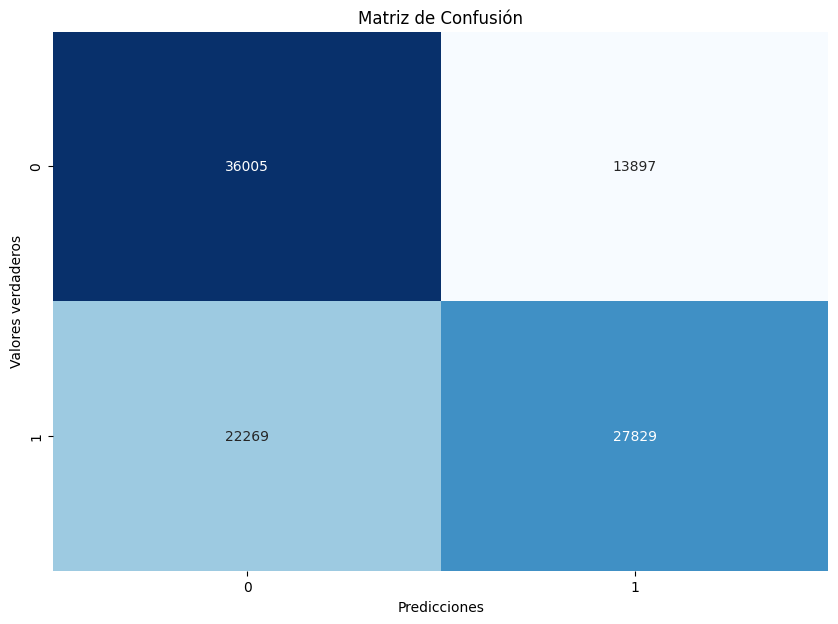

In [ ]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, predicciones)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
plt.show()